In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
conc = pd.read_csv('./concrete.csv')
conc.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
conc.shape

(1030, 9)

In [4]:
input_shape = 8

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(input_shape,)),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),
])

c:\Users\91972\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


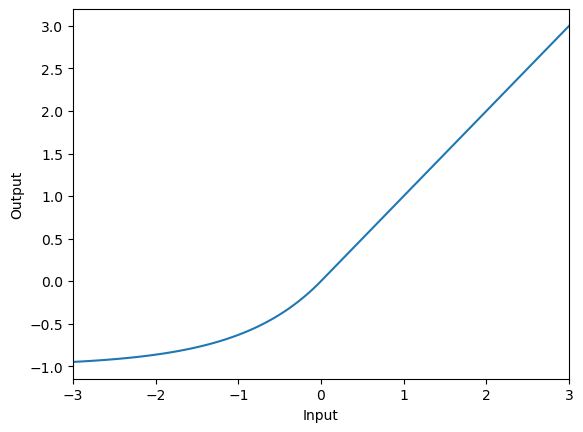

In [7]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1155.0059 - mae: 29.2525 - val_loss: 202.2246 - val_mae: 11.7224
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 280.2530 - mae: 13.5410 - val_loss: 174.5388 - val_mae: 11.2087
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 209.1110 - mae: 11.8726 - val_loss: 168.9434 - val_mae: 10.8573
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 191.9101 - mae: 11.0596 - val_loss: 145.5106 - val_mae: 9.9251
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 150.4942 - mae: 9.9835 - val_loss: 139.9101 - val_mae: 9.7585
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132.4651 - mae: 9.1638 - val_loss: 120.0052 - val_mae: 8.9331
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 109.4229 - mae: 8.4053 - val_loss: 107.5591 - val_mae: 7.9938
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.6021 - mae: 7.3942 - val_loss: 87.1685 - val_mae: 7.2119
Epoch 9/100
21/21 ━━━━━━━

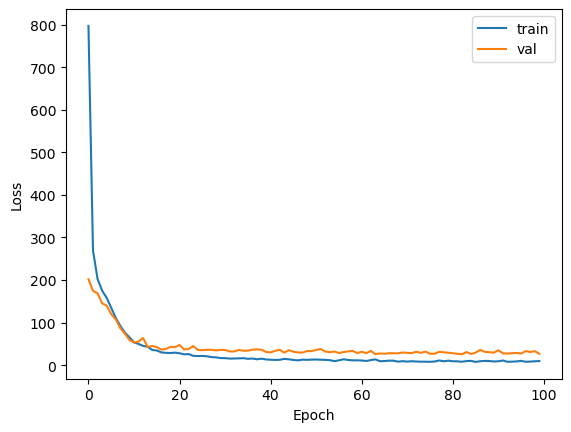

In [8]:
# 1. Preprocess the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = conc.drop('CompressiveStrength', axis=1)
y = conc['CompressiveStrength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# 4. Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print('Test MAE:', test_mae)

# 5. Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
# ...existing code...
model.save('concrete_strength_model.h5')
# ...existing code...

In [10]:
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']